## Libraries

In [ ]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
import scipy

import matplotlib.pyplot  as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler
from datetime import datetime

# for feature selection
import scipy.io

# for one-hot encoder
from sklearn.preprocessing import OneHotEncoder

# for clustering
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
# from kmodes.kmodes import KModes

# for feature extraction
from sklearn.decomposition import PCA

# for HCA
from scipy.cluster.hierarchy import dendrogram, linkage

# for cluster evaluation
## silhouette
from sklearn.metrics import silhouette_score
# for anomalous detection
from sklearn.ensemble import IsolationForest

## Import Data

In [ ]:
csv_file = '2022-10-25 cdn_customer_qoe_anon.xlsx'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_excel('/content/drive/My Drive/Colab Notebooks/DS_lab2/dataset/'+csv_file, 'cdn_customer_qoe_anon')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# df = pd.read_excel('dataset/'+csv_file, 'cdn_customer_qoe_anon')

In [ ]:
df_buffer = df.copy() 

In [ ]:
df = df_buffer

In [ ]:
df

,Column1,Start Time,Playtime,Effective Playtime,Interruptions,Join Time,Buffer Ratio,CDN Node Host,Connection Type,Device,...,End of Playback Status,User_ID_N,Title_N,Program_N,Device_Vendor_N,Device_Model_N,Content_TV_Show_N,Country_N,City_N,Region_N
0,0,2022-07-12 00:00:14,11,10,0,0.88,0.00,NaN,Ethernet-100,Android TV,...,On Stop,564,784,0,16,64,2672,3,263,0
1,1,2022-07-12 00:00:38,73,72,0,1.17,0.00,NaN,WiFi-5,Android TV,...,On Stop,480,1,0,13,63,2672,3,76,0
2,2,2022-07-12 00:02:02,21,20,0,1.13,0.00,NaN,WiFi-5,Android TV,...,On Stop,346,786,0,13,63,2672,3,76,0
3,3,2022-07-12 00:02:24,1,0,0,0.00,0.00,NaN,WiFi-5,Android TV,...,On Stop,346,997,0,13,63,2672,3,76,0
4,4,2022-07-12 00:02:25,1,0,0,0.00,0.00,NaN,WiFi-5,Android TV,...,On Stop,346,997,0,13,63,2672,3,76,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102251,102251,2022-07-25 23:06:05,15282,0,0,0.00,0.00,NaN,Mobile,iPhone,...,On Stop,570,1504,0,2,153,2434,3,367,0
102252,102252,2022-07-25 22:55:39,16582,16581,0,0.99,0.00,11377663,WiFi-5,Android TV,...,On Stop,475,1014,0,13,63,2672,3,39,0
102253,102253,2022-07-25 23:09:33,21166,0,0,0.00,0.00,NaN,WiFi-5,Android,...,On Stop,249,1076,0,16,41,2672,3,56,0
102254,102254,2022-07-25 11:47:37,65122,65115,2,6.10,0.00,NaN,None,PC( Windows ),...,On Stop,622,1437,0,8,158,694,3,56,0


In [ ]:
# bringing the Numerical valued attributes names
# ====================================================
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df.select_dtypes(include=numerics).columns

## 19 columns

Index(['Column1', 'Playtime', 'Effective Playtime', 'Interruptions',
       'Join Time', 'Buffer Ratio', 'Happiness Score', 'Playback Stalls',
       'Startup Error (Count)', 'Latency', 'User_ID_N', 'Title_N', 'Program_N',
       'Device_Vendor_N', 'Device_Model_N', 'Content_TV_Show_N', 'Country_N',
       'City_N', 'Region_N'],
      dtype='object')

In [ ]:
# bringing the Categorical object valued attributes names
# ====================================================
df.select_dtypes(include=['object']).columns

## 12 columns

Index(['CDN Node Host', 'Connection Type', 'Device', 'Device Type', 'Browser',
       'Browser Version', 'OS', 'OS Version', 'Device ID', 'Happiness Value',
       'Crash Status', 'End of Playback Status'],
      dtype='object')

In [ ]:
# Date attributes names
# ====================================================

# ['Start Time, 'End Time']

## 2 columns

## Explore Data

In [ ]:
df[['Start Time', 'End Time']]

# the time series is observed over the period of 2 weeks
# the difference between start time and end time almost fixed: 2 months and 22 days

In [ ]:
df.describe()

,Column1,Playtime,Effective Playtime,Interruptions,Join Time,Buffer Ratio,Happiness Score,Playback Stalls,Startup Error (Count),Latency,User_ID_N,Title_N,Program_N,Device_Vendor_N,Device_Model_N,Content_TV_Show_N,Country_N,City_N,Region_N
count,102256.00,102256.00,102256.00,102256.00,102256.00,102256.00,102256.00,102256.00,102256.00,102256.00,102256.00,102256.00,102256.00,102256.00,102256.00,102256.00,102256.00,102256.00,102256.00
mean,51127.50,328.97,288.34,0.10,1.16,0.26,5.17,0.00,0.01,13360.82,392.98,809.66,0.00,13.13,69.46,2421.41,3.93,150.77,0.03
std,29518.91,1799.36,1697.49,12.01,2.84,3.57,4.38,0.20,0.12,23550.86,161.31,527.74,0.00,4.62,33.35,631.70,2.55,107.74,0.16
min,0.00,0.00,0.00,0.00,0.00,0.00,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,25563.75,4.00,1.00,0.00,0.58,0.00,0.00,0.00,0.00,0.00,295.00,261.00,0.00,13.00,63.00,2672.00,3.00,76.00,0.00
50%,51127.50,22.00,17.00,0.00,0.79,0.00,6.65,0.00,0.00,17862.00,383.00,997.00,0.00,15.00,64.00,2672.00,3.00,76.00,0.00
75%,76691.25,90.00,75.00,0.00,1.30,0.00,9.61,0.00,0.00,19235.00,487.00,1170.25,0.00,16.00,64.00,2672.00,3.00,240.00,0.00
max,102255.00,86404.00,86402.00,3786.00,120.00,100.00,10.00,44.41,1.00,359477.00,699.00,1638.00,0.00,24.00,163.00,2746.00,14.00,405.00,1.00


### QoE metrice effect on playtime

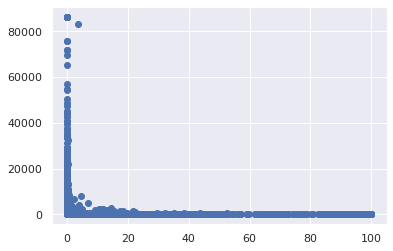

In [ ]:
plt.plot( df["Buffer Ratio"],df["Effective Playtime"], 'bo')

it shows the effect of buffer ratio on the effective playing time

In [ ]:
# null values
null_values = df.isnull().sum()
df_nulls = pd.DataFrame({'Column':null_values.index, 'Nulls':null_values.values})

# Count non empty cells
df_count = df_nulls
df_count = df_count.rename(columns={"Nulls": "Count"})
nb_rows = df.shape[0] # 102256
df_count.iloc[:,1] = nb_rows - df_count.iloc[:,1]

# count unique cells
uniqueValues = df.nunique()
df_unique = pd.DataFrame({'Column':uniqueValues.index, 'Unique':uniqueValues.values})


In [ ]:
# merge all together in one dataframe
analyzed_df = pd.concat([df_nulls.iloc[:,0], df_count.iloc[:,1], df_nulls.iloc[:,1], df_unique.iloc[:,1]], axis = 1)
print(analyzed_df)

                    Column   Count   Nulls  Unique
0                  Column1  102256       0  102256
1               Start Time  102256       0   96503
2                 Playtime  102256       0    4752
3       Effective Playtime  102256       0    4440
4            Interruptions  102256       0      43
5                Join Time  102256       0    5554
6             Buffer Ratio  102256       0    2076
7            CDN Node Host   36979   65277     342
8          Connection Type  102256       0      19
9                   Device  102256       0      15
10             Device Type  102256       0      13
11                 Browser  102256       0      15
12         Browser Version  101411     845      64
13                      OS  102256       0       9
14              OS Version  102256       0      78
15               Device ID  102256       0    1692
16         Happiness Value  102255       1       5
17         Happiness Score  102256       0    6534
18         Playback Stalls  102

## Both are categorical: **1st** with strings, **2nd** with numbers, should do one-hot encoding except 'Happiness Score' because it is ordinal

'Connection Type', 'Device', 'Device Type', 'Browser', "Browser Version", 'OS', "OS Version", 'Crash Status', 'End of Playback Status'

'Device ID', 'Country_N', 'Region_N'

! 'Happiness Score' (will not)

! 'Content_TV_Show_N', will be removed due to high number of categories

In [ ]:
df['Interruptions'].value_counts()

In [ ]:
# bringing the Numerical valued attributes names
# ====================================================
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df.select_dtypes(include=numerics).columns

## 19 columns

Index(['Column1', 'Playtime', 'Effective Playtime', 'Interruptions',
       'Join Time', 'Buffer Ratio', 'Happiness Score', 'Playback Stalls',
       'Startup Error (Count)', 'Latency', 'User_ID_N', 'Title_N', 'Program_N',
       'Device_Vendor_N', 'Device_Model_N', 'Content_TV_Show_N', 'Country_N',
       'City_N', 'Region_N'],
      dtype='object')

In [ ]:
# bringing the Categorical object valued attributes names
# ====================================================
df.select_dtypes(include=['object']).columns

## 12 columns

Index(['CDN Node Host', 'Connection Type', 'Device', 'Device Type', 'Browser',
       'Browser Version', 'OS', 'OS Version', 'Device ID', 'Happiness Value',
       'Crash Status', 'End of Playback Status'],
      dtype='object')

## Data Cleaning

remove 'Column1'

In [ ]:
df.drop(['Column1'], axis=1, inplace=True)

remove 'Program_N', it adds no value, all Zeros

In [ ]:
df.drop(['Program_N'], axis=1, inplace=True)

remove 'Playtime' due to high correlation with 'Effective Playtime'

In [ ]:
df.drop(['Playtime'], axis=1, inplace=True)

remove 'CDN Node Host' due to high percentage of missing values

In [ ]:
df.drop(['CDN Node Host'], axis=1, inplace=True)

remove ' Happiness Value' as  Happiness score exists

In [ ]:
df.drop(['Happiness Value'], axis=1, inplace=True)

remove 'Start Time', 'End Time'
Because this in this approuch will not use time series in ADetection 

In [ ]:
df.drop(['Start Time'], axis=1, inplace=True)
df.drop(['End Time'], axis=1, inplace=True)

Removing 'Content_TV_Show_N' due to the high cardinality

In [ ]:
df.drop(['Content_TV_Show_N'], axis=1, inplace=True)

keeping the 'Crash Status' as the empty values means no crash happened

In [ ]:
df['Crash Status'].value_counts()

Startup Error Crash      1276
In Stream Error Crash     569
Name: Crash Status, dtype: int64

# filling missing data

In [ ]:
df['Browser Version'].fillna(df['Browser Version'].mode()[0], inplace = True)

In [ ]:
df['Crash Status'] = df['Crash Status'].fillna('no crash')

In [ ]:
df['End of Playback Status'].fillna(df['End of Playback Status'].mode()[0], inplace = True)

# Milestone

In [ ]:
# null values
null_values = df.isnull().sum()
df_nulls = pd.DataFrame({'Column':null_values.index, 'Nulls':null_values.values})

# Count non empty cells
df_count = df_nulls
df_count = df_count.rename(columns={"Nulls": "Count"})
nb_rows = df.shape[0] # 102256
df_count.iloc[:,1] = nb_rows - df_count.iloc[:,1]

# count unique cells
uniqueValues = df.nunique()
df_unique = pd.DataFrame({'Column':uniqueValues.index, 'Unique':uniqueValues.values})

In [ ]:
# merge all together in one dataframe
analyzed_df = pd.concat([df_nulls.iloc[:,0], df_count.iloc[:,1], df_nulls.iloc[:,1], df_unique.iloc[:,1]], axis = 1)
print(analyzed_df)

                    Column   Count  Nulls  Unique
0       Effective Playtime  102256      0    4440
1            Interruptions  102256      0      43
2                Join Time  102256      0    5554
3             Buffer Ratio  102256      0    2076
4          Connection Type  102256      0      19
5                   Device  102256      0      15
6              Device Type  102256      0      13
7                  Browser  102256      0      15
8          Browser Version  102256      0      64
9                       OS  102256      0       9
10              OS Version  102256      0      78
11               Device ID  102256      0    1692
12         Happiness Score  102256      0    6534
13         Playback Stalls  102256      0     425
14   Startup Error (Count)  102256      0       2
15                 Latency  102256      0   13416
16            Crash Status  102256      0       3
17  End of Playback Status  102256      0       4
18               User_ID_N  102256      0     700


In [ ]:
df_2 = df.copy() 

In [ ]:
# df = df_2

# One-hot Encoding

In [ ]:
# to be encoded
df_categorical_fields_one_hot_encod = ['Connection Type', 'Device', 'Device Type', 'Browser', "Browser Version", 'OS', "OS Version", 'Crash Status', 'End of Playback Status','Device ID' ,'Country_N', 'Region_N']

In [ ]:
df.shape

(102256, 25)

In [ ]:
#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

# One-hot-encode the categorical columns.
enc_package_type = pd.DataFrame(encoder.fit_transform(df[df_categorical_fields_one_hot_encod]).toarray())

#merge one-hot encoded columns back with original DataFrame
df = df_2.join(enc_package_type)

In [ ]:
df.shape

(102256, 1954)

In [ ]:
# drop the features that was encoeded from
df.drop(df_categorical_fields_one_hot_encod, axis=1 ,inplace=True)

In [ ]:
df.shape

(102256, 1942)

In [ ]:
df

,Effective Playtime,Interruptions,Join Time,Buffer Ratio,Happiness Score,Playback Stalls,Startup Error (Count),Latency,User_ID_N,Title_N,...,1919,1920,1921,1922,1923,1924,1925,1926,1927,1928
0,10,0,0.88,0.00,7.39,0.00,0,19504,564,784,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
1,72,0,1.17,0.00,9.40,0.00,0,19033,480,1,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
2,20,0,1.13,0.00,7.00,0.00,0,19071,346,786,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
3,0,0,0.00,0.00,0.00,0.00,0,0,346,997,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
4,0,0,0.00,0.00,0.00,0.00,0,0,346,997,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102251,0,0,0.00,0.00,0.00,0.00,0,0,570,1504,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
102252,16581,0,0.99,0.00,10.00,0.00,0,18191,475,1014,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
102253,0,0,0.00,0.00,0.00,0.00,0,0,249,1076,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
102254,65115,2,6.10,0.00,7.46,0.00,0,27550,622,1437,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00


# Milestone

In [ ]:
df_3 = df.copy() 

## setup of anomalous detection

### min-max scaler for the model

In [ ]:
# MinMaxScaler
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df_scaled = min_max_scaler.fit_transform(df)
df = pd.DataFrame(df_scaled, columns=df.columns)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
df

In [ ]:
model =  IsolationForest(n_jobs=-1, n_estimators=200, max_features=3, random_state=42, contamination=0.01)

In [ ]:
# 

INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=7707, verbose=0)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
# 


INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=7707, verbose=0), transformation=False, score=True, verbose=True)
INFO:logs:Checking exceptions
INFO:logs:Determining Trained Model
INFO:logs:Trained Model : Isolation Forest
INFO:logs:Copying data
INFO:logs:(102256, 34)
INFO:logs:assign_model() succesfully completed......................................


In [ ]:
# results['Anomaly'].value_counts()

0    97143
1     5113
Name: Anomaly, dtype: int64

In [ ]:
# results.to_csv('results.csv')


In [ ]:
model.fit(df)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


IsolationForest(contamination=0.01, max_features=3, n_estimators=200, n_jobs=-1,
                random_state=42)

In [ ]:
df['Anomaly'] = pd.Series(model.predict(df))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
df.shape

(102256, 1943)

In [ ]:
df

In [ ]:
# Labelling anomalous requests detected by Isolation Forest 
df['Anomaly'] = df['Anomaly'].map( {1: 0, -1: 1} )
df['Anomaly'].value_counts()

0    101233
1      1023
Name: Anomaly, dtype: int64

#########



#########